<a href="https://colab.research.google.com/github/k-24ura/my-first-repo/blob/update-readme/%E8%87%AA%E5%AE%85%E9%80%80%E9%99%A2%E5%88%86%E6%9E%90.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install japanize_matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
import japanize_matplotlib
import seaborn as sns
import pandas as pd
import numpy as np
sns.set(font="IPAexGothic",style="white")
pd.set_option('display.max_columns', 150)
pd.set_option('display.max_rows', 150)

df=pd.read_excel("/content/drive/MyDrive/data/ent_model.xlsx")
df=df.rename(columns={"転帰先(1自宅 2転院)":"転帰先","性別(女1　男0)":"性別","離床（端座位）":"離床","部位（BA；1　M；2　IC；3）":"部位"})
df["転帰先"]=df["転帰先"]-1
#部位のダミー化
df=pd.get_dummies(df,columns=["部位"],drop_first=True)
#日付と退院時項目削除
df=df.drop(["手術日","リハ開始日","離床","退院日","発症～退院","退FIM運動","退FIM認知","退院時BI","退上肢","退手指","退下肢"],1)
df=df.drop(df.columns[35:53],1)
#BRS変換
df["入上肢"]=df["入上肢"].apply(lambda x:6 if x==7 else x)
df["入手指"]=df["入手指"].apply(lambda x:6 if x==7 else x)
df["入下肢"]=df["入下肢"].apply(lambda x:6 if x==7 else x)
#FIMの下位項目削除＋FIM合計点算出
df2=df.drop(df.columns[17:35],1)
df2["入FIM合計"]=df2["入FIM運動"]+df2["入FIM認知"]
#BI削除
df2=df2.drop(["入FIM運動","入FIM認知","入院時BI","入上肢","入手指"],1)
#欠損値削除
df2=df2.dropna()
#後ｍRS,後NIHSS,入FIM合計で分ける
df_mRS=df2[["転帰先","年齢","性別","発症～離床","前ASPECTa","前ASPECTb","発症～再開通（分）","後ｍRS","入下肢"]]
df_NIHSS=df2[["転帰先","年齢","性別","発症～離床","前ASPECTa","前ASPECTb","発症～再開通（分）","後NIHSS","前NIHSS","入下肢"]]
df_FIM=df2[["転帰先","年齢","性別","発症～離床","前ASPECTa","前ASPECTb","発症～再開通（分）","入FIM合計","入下肢"]]

In [ ]:
print(df2.shape)
df2.head()

(98, 18)


,転帰先,年齢,性別,発症～リハ開始,発症～離床,前ASPECTa,前ASPECTb,前NIHSS,後NIHSS,前ｍRS,後ｍRS,術後TICI,発症～手術（分）,発症～再開通（分）,入下肢,部位_2,部位_3,入FIM合計
0,0,86,1,1,5,10,8,7,3,1,1,3.0,390,450,5,1,0,84
1,0,68,1,2,3,6,6,13,3,0,1,4.0,280,360,5,0,1,76
2,1,73,0,4,7,9,8,13,4,2,5,3.0,190,270,3,0,1,36
3,1,88,0,2,4,9,9,27,7,1,3,4.0,143,198,5,0,1,41
4,1,62,1,2,6,10,6,23,11,0,4,4.0,275,315,2,0,1,22


In [ ]:
df2.describe()

,転帰先,年齢,性別,発症～リハ開始,発症～離床,前ASPECTa,前ASPECTb,前NIHSS,後NIHSS,前ｍRS,後ｍRS,術後TICI,発症～手術（分）,発症～再開通（分）,入下肢,部位_2,部位_3,入FIM合計
count,98.000000,98.000000,98.000000,98.000000,98.000000,98.000000,98.000000,98.000000,98.000000,98.000000,98.000000,98.000000,98.000000,98.000000,98.000000,98.000000,98.000000,98.000000
mean,0.744898,75.908163,0.459184,2.071429,4.173469,8.918367,6.928571,18.908163,9.306122,0.581633,2.918367,3.091837,209.816327,280.000000,3.755102,0.591837,0.285714,52.928571
std,0.438160,12.001793,0.500893,2.483969,3.777376,1.374836,2.221033,7.206936,7.952706,0.716858,1.524193,1.075373,138.663677,145.311184,1.741319,0.494021,0.454077,34.415967
min,0.000000,31.000000,0.000000,0.000000,1.000000,4.000000,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000,49.000000,104.000000,1.000000,0.000000,0.000000,0.000000
25%,0.250000,68.000000,0.000000,1.000000,1.250000,8.000000,6.000000,13.000000,3.000000,0.000000,2.000000,3.000000,125.000000,185.000000,2.000000,0.000000,0.000000,22.000000
50%,1.000000,76.000000,0.000000,1.000000,3.000000,9.000000,7.000000,18.000000,7.000000,0.000000,3.000000,3.000000,170.000000,244.500000,4.000000,1.000000,0.000000,39.500000
75%,1.000000,86.000000,1.000000,2.000000,5.000000,10.000000,8.000000,25.000000,13.000000,1.000000,4.000000,4.000000,251.500000,319.250000,5.000000,1.000000,1.000000,78.000000
max,1.000000,100.000000,1.000000,16.000000,20.000000,10.000000,11.000000,34.000000,30.000000,2.000000,6.000000,4.000000,903.000000,947.000000,6.000000,1.000000,1.000000,126.000000


In [ ]:
df2.groupby("転帰先").median().T

転帰先,0,1
年齢,73.0,78.0
性別,0.0,1.0
発症～リハ開始,1.0,1.0
発症～離床,2.0,4.0
前ASPECTa,10.0,9.0
前ASPECTb,8.0,6.0
前NIHSS,15.0,20.0
後NIHSS,2.0,10.0
前ｍRS,0.0,0.0
後ｍRS,1.0,4.0


In [ ]:
df2.corr(method="spearman")["転帰先"].sort_values(ascending=False)

転帰先          1.000000
後ｍRS         0.732501
後NIHSS       0.684816
発症～離床        0.322682
前NIHSS       0.252700
年齢           0.232266
性別           0.210421
発症～再開通（分）    0.196948
前ｍRS         0.194427
部位_3         0.162851
発症～リハ開始      0.153695
発症～手術（分）     0.126613
部位_2        -0.152600
術後TICI      -0.178148
前ASPECTa    -0.200008
前ASPECTb    -0.280789
入下肢         -0.608700
入FIM合計      -0.722320
Name: 転帰先, dtype: float64

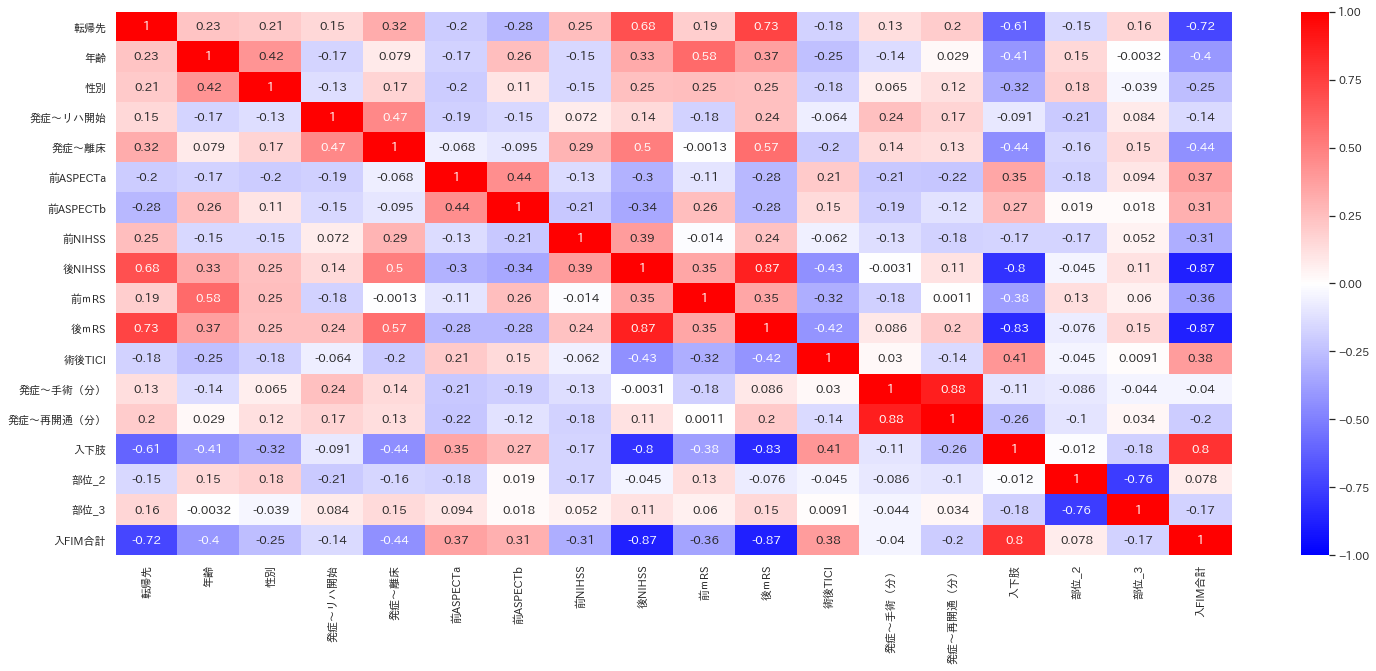

In [ ]:
plt.figure(figsize=(25,10))
sns.heatmap(df2.corr(method="spearman"),cmap="bwr",annot=True,vmax=1,vmin=-1,center=0);
plt.savefig("相関行列.png")

In [ ]:
import statsmodels.api as sm
X=df2[["入FIM合計","後ｍRS","後NIHSS"]]
X=sm.add_constant(X)
y=df2["転帰先"]
lr=sm.Logit(y,X)
result=lr.fit()
result.summary()

Optimization terminated successfully.
         Current function value: 0.072446
         Iterations 12


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                    転帰先   No. Observations:                   98
Model:                          Logit   Df Residuals:                       94
Method:                           MLE   Df Model:                            3
Date:                Mon, 17 May 2021   Pseudo R-squ.:                  0.8724
Time:                        00:28:52   Log-Likelihood:                -7.0997
converged:                       True   LL-Null:                       -55.651
Covariance Type:            nonrobust   LLR p-value:                 6.520e-21
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.4556      4.146      0.592      0.554      -5.670      10.582
入FIM合計        -0.1590      0.071     -2.228      0.026      -0.299      -0.019
後ｍRS           4.6179      2.310      1.999      0.046       0.090       9.146
後NIHSS         0.6284      0.727      0.865      0.387      -0.796       2.053
==============================================================================

Possibly complete quasi-separation: A fraction 0.64 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified.
"""

In [ ]:
from scipy import stats
for i in df2.columns:
  print(i)
  print(stats.spearmanr(df2["転帰先"],df2[i]))

転帰先
SpearmanrResult(correlation=1.0, pvalue=0.0)
年齢
SpearmanrResult(correlation=0.2322656900379425, pvalue=0.02137016452549136)
性別
SpearmanrResult(correlation=0.21042090985965686, pvalue=0.03755499893692421)
発症～リハ開始
SpearmanrResult(correlation=0.15369519696359238, pvalue=0.13079455427890346)
発症～離床
SpearmanrResult(correlation=0.3226822757931288, pvalue=0.001192990576522978)
前ASPECTa
SpearmanrResult(correlation=-0.2000084313469124, pvalue=0.04831604110805873)
前ASPECTb
SpearmanrResult(correlation=-0.2807891198467956, pvalue=0.005101061193614405)
前NIHSS
SpearmanrResult(correlation=0.25269956424906037, pvalue=0.012059932294680213)
後NIHSS
SpearmanrResult(correlation=0.6848155045537393, pvalue=7.496208222866461e-15)
前ｍRS
SpearmanrResult(correlation=0.19442749975885765, pvalue=0.05506182445854235)
後ｍRS
SpearmanrResult(correlation=0.7325013947587727, pvalue=1.0206619822207898e-17)
術後TICI
SpearmanrResult(correlation=-0.17814774822543966, pvalue=0.07925713331191354)
発症～手術（分）
SpearmanrResult(corre

In [ ]:
X=df2[["入FIM合計","後ｍRS","後NIHSS"]]
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif["features"] = X.columns
vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
print(vif)

   features        VIF
0    入FIM合計  11.843109
1      後ｍRS  18.447560
2    後NIHSS   8.747873
3  前ASPECTa  33.228039
4    術後TICI  10.007182
5    前NIHSS   9.872572


In [ ]:
df_mRS.corr()

,転帰先,年齢,性別,発症～離床,前ASPECTa,前ASPECTb,発症～再開通（分）,後ｍRS,入下肢
転帰先,1.000000,0.183700,0.210421,0.301081,-0.188950,-0.283755,0.204179,0.740334,-0.596180
年齢,0.183700,1.000000,0.377504,0.123606,-0.187895,0.181136,-0.021151,0.333215,-0.380922
性別,0.210421,0.377504,1.000000,0.120928,-0.259384,0.103920,0.031019,0.252155,-0.318889
発症～離床,0.301081,0.123606,0.120928,1.000000,-0.126278,-0.137363,-0.033300,0.559361,-0.468375
前ASPECTa,-0.188950,-0.187895,-0.259384,-0.126278,1.000000,0.413338,-0.098253,-0.268876,0.340369
前ASPECTb,-0.283755,0.181136,0.103920,-0.137363,0.413338,1.000000,-0.159714,-0.291046,0.272653
発症～再開通（分）,0.204179,-0.021151,0.031019,-0.033300,-0.098253,-0.159714,1.000000,0.166079,-0.212433
後ｍRS,0.740334,0.333215,0.252155,0.559361,-0.268876,-0.291046,0.166079,1.000000,-0.827192
入下肢,-0.596180,-0.380922,-0.318889,-0.468375,0.340369,0.272653,-0.212433,-0.827192,1.000000


In [ ]:
df_mRS.to_csv("df_mRS.csv",index=False)
df_NIHSS.to_csv("df_NIHSS.csv",index=False)
df_FIM.to_csv("df_FIM.csv",index=False)
df2.to_csv("df2.csv",index=False)


In [ ]:
#入院時FIM
np.exp(-0.00918)

0.9908620075585954

In [ ]:
#後mRS
np.exp(0.117426)

1.1245984065824195

In [ ]:
#後NIHSS
np.exp(-0.016233)

0.9838980451012816